In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

12th of April, 15:00 data recorded. 

Fatigue started to set in after a minute.  
This dual myo configuration used is shown below, with two Myos on the forearm, interweaved. 

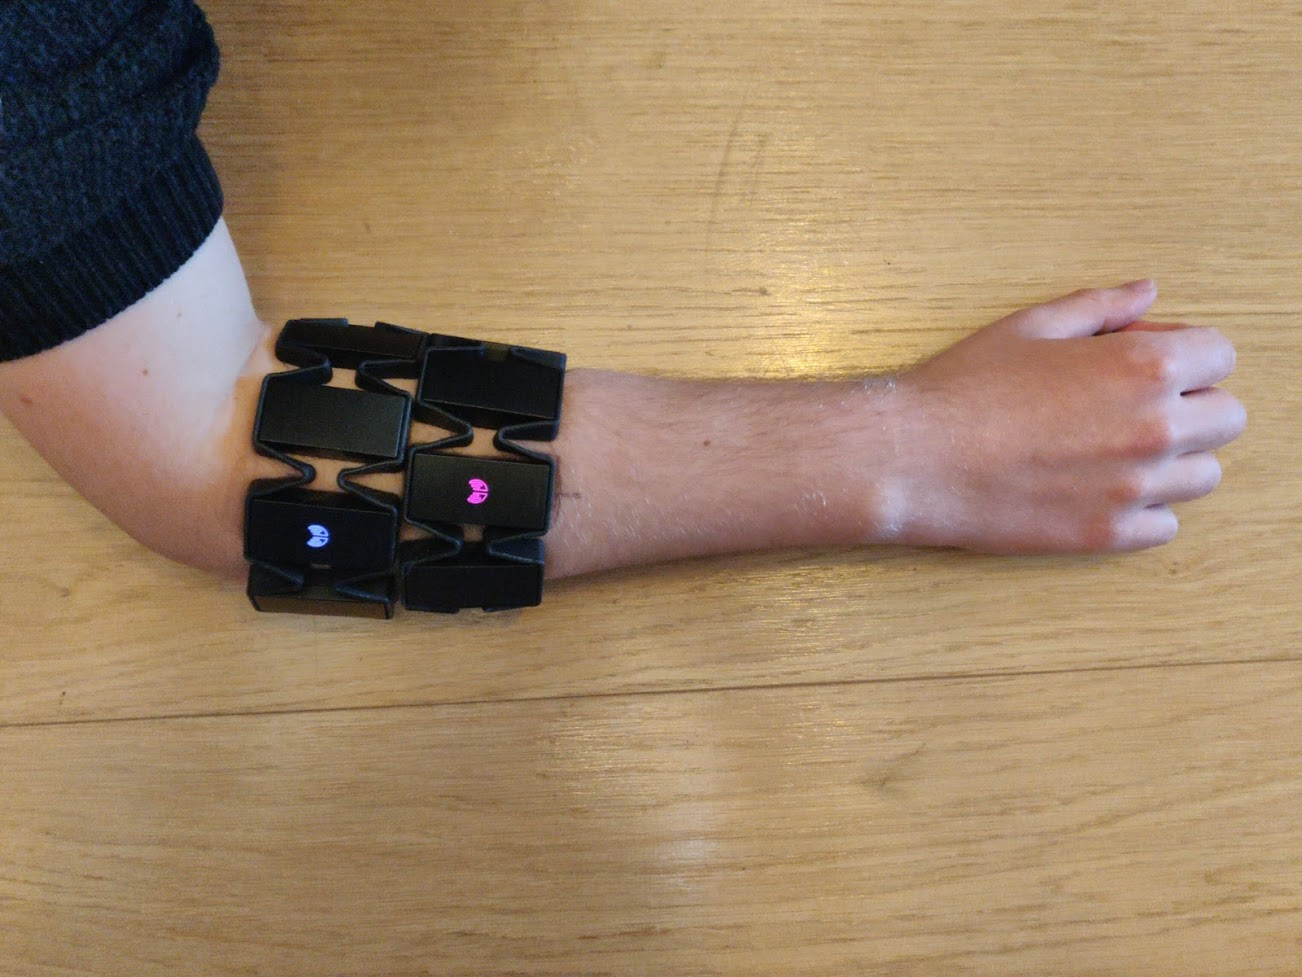

In [2]:
data = pd.read_csv("../data/dual_thumb_emg_60.csv")

In [3]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,...,Index_tip_y,Middle_tip_y,Ring_tip_y,Pinky_tip_y,Palm_tip_z,Thumb_tip_z,Index_tip_z,Middle_tip_z,Ring_tip_z,Pinky_tip_z
0,38,88,252,257,81,50,59,23,41,147,...,-43.386700,-53.972740,-50.243446,-36.320568,137.089188,105.134331,129.964310,115.446671,108.859253,107.252762
1,37,97,243,260,86,53,55,26,40,184,...,-42.721672,-53.370323,-50.110477,-35.945507,136.136719,103.009850,128.580948,114.455467,108.654480,106.833107
2,37,102,243,265,90,54,46,25,43,193,...,-42.449268,-53.134682,-50.116726,-35.815678,135.790863,102.313622,128.300842,114.272583,108.809326,106.735008
3,33,88,223,252,90,54,47,25,41,198,...,-42.270390,-52.947456,-50.086948,-35.710522,135.611359,102.186020,128.361481,114.226471,108.880798,106.574326
4,33,92,219,231,90,57,53,26,43,196,...,-42.127304,-52.701702,-49.903473,-35.410583,135.473785,102.715973,128.702591,114.269585,108.807350,106.149559


<AxesSubplot:>

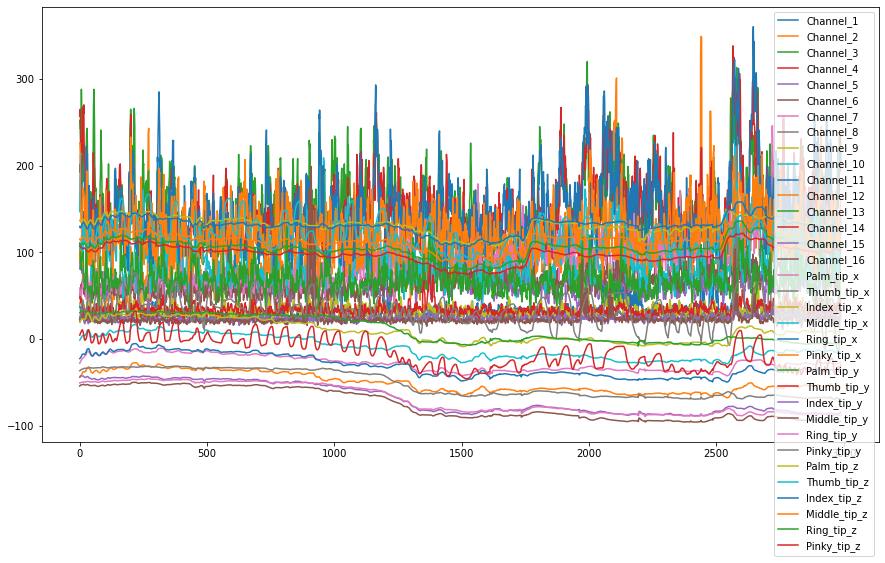

In [4]:
plt.rc('figure', figsize=(15, 8))

data.plot(figsize=(15, 8))

<AxesSubplot:>

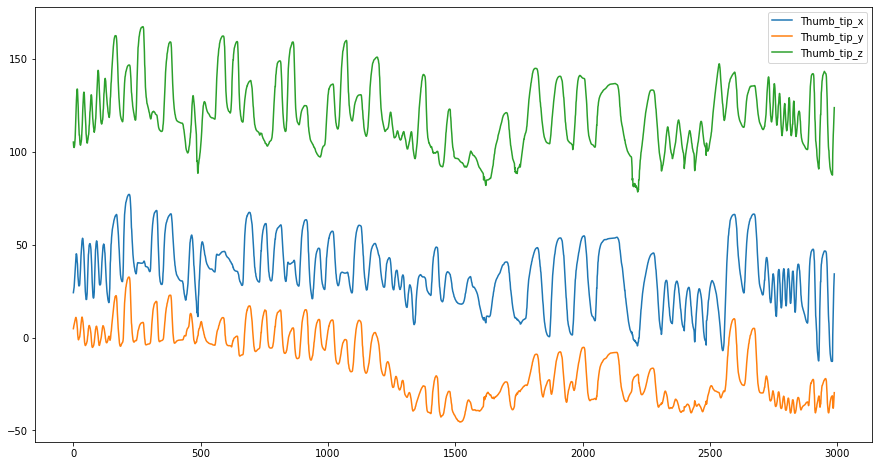

In [5]:
# Just considering the thumb
cols = ['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z']
df = data[cols]
df.plot()

In [6]:
data.var()

Channel_1         92.940473
Channel_2       1047.795142
Channel_3       1583.356274
Channel_4       1396.340594
Channel_5        113.502041
Channel_6        219.077164
Channel_7        730.230781
Channel_8        175.035141
Channel_9         60.000913
Channel_10       921.456540
Channel_11      1609.849338
Channel_12       705.221750
Channel_13       232.078210
Channel_14        33.407059
Channel_15        10.273463
Channel_16       166.005524
Palm_tip_x        76.129508
Thumb_tip_x      286.708119
Index_tip_x      155.553934
Middle_tip_x     168.081903
Ring_tip_x       159.660740
Pinky_tip_x      126.180649
Palm_tip_y       227.297927
Thumb_tip_y      310.949509
Index_tip_y      297.930255
Middle_tip_y     307.276405
Ring_tip_y       282.704055
Pinky_tip_y      231.411926
Palm_tip_z        85.594525
Thumb_tip_z      321.507228
Index_tip_z       87.817178
Middle_tip_z     106.199853
Ring_tip_z       109.635993
Pinky_tip_z       99.242432
dtype: float64

<AxesSubplot:>

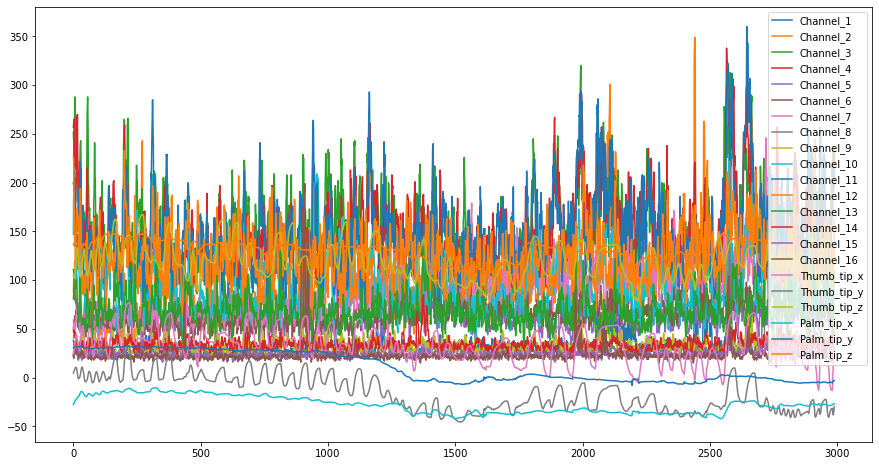

In [7]:
# Just considering the data we care about
cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
        'Channel_5','Channel_6', 'Channel_7', 'Channel_8',
        'Channel_9','Channel_10', 'Channel_11', 'Channel_12',
        'Channel_13','Channel_14', 'Channel_15', 'Channel_16',
       'Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 
       'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df = data[cols]
df.plot()

[Text(0.5, 1.0, 'sEMG and Leap corrolations')]

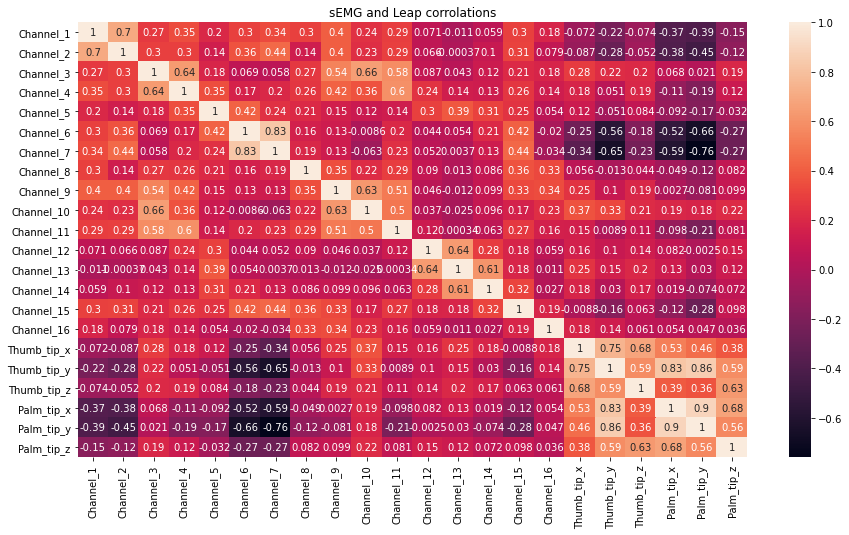

In [8]:
sns.heatmap(df.corr(), annot=True).set(title="sEMG and Leap corrolations")


## The 30 second single thumb data
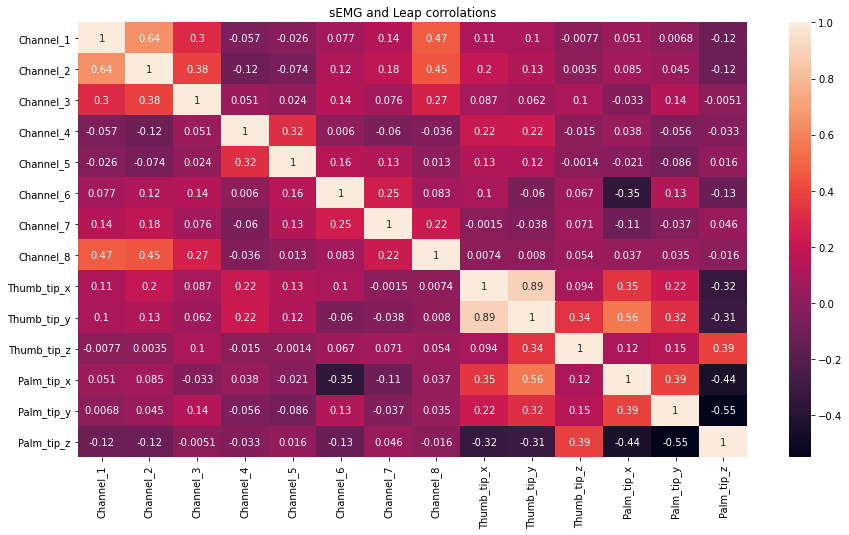

# Feature engineering: relative positions

<ipython-input-9-f8b425cd3e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
<ipython-input-9-f8b425cd3e6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
<ipython-input-9-f8b425cd3e6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

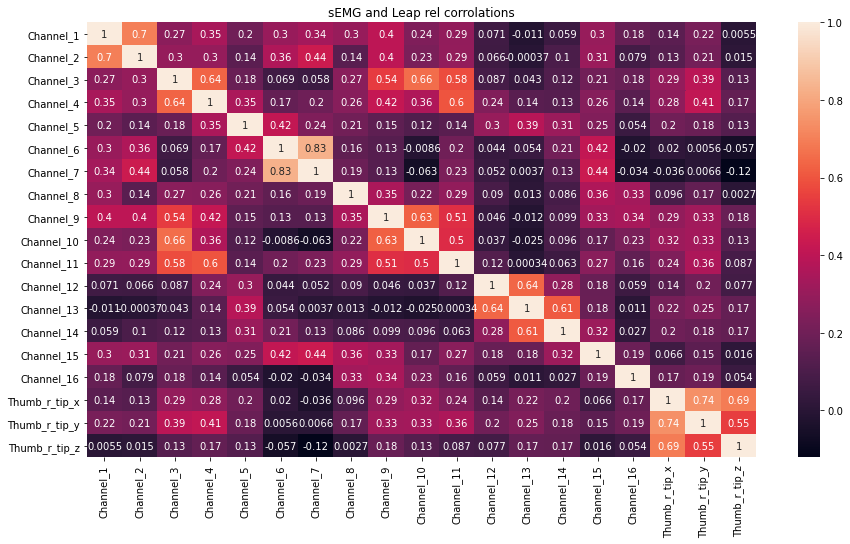

In [9]:
df_rel = df
df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
df_rel["Thumb_r_tip_z"] = df_rel["Thumb_tip_z"] - df_rel['Palm_tip_z']

drop_cols = ['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df_rel = df_rel.drop(drop_cols,1)
sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

# Making some baseline ML

In [10]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_r_tip_x']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error Y: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error Y: 9.229517628005482


In [12]:
for y_var in y_cols:
    y = df_rel[y_var]
    X = df_rel[x_cols]
    train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)
    
    my_model = XGBRegressor()
    # Add silent=True to avoid printing out updates with each cycle
    my_model.fit(train_X, train_y, verbose=False)

    predictions = my_model.predict(test_X)

    print(f"Mean Absolute Error {y_var}: {str(mean_absolute_error(predictions, test_y))}")

Mean Absolute Error Thumb_r_tip_x: 9.291524767875671
Mean Absolute Error Thumb_r_tip_y: 5.523981985949817
Mean Absolute Error Thumb_r_tip_z: 9.471874362684508


# Neural Network Approach

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import MinMaxScaler

In [14]:
df_rel.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16', 'Thumb_r_tip_x', 'Thumb_r_tip_y', 'Thumb_r_tip_z'],
      dtype='object')

In [15]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16',]

y = df_rel[y_cols]
X = df_rel[x_cols]

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(nX, ny, test_size=0.25)

In [16]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal'))

# Compile the network :
NN_model.compile(loss='mae', optimizer='Adam')
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 69,003
Trainable params: 69,003
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/500
71/71 [==============================] - 0s 3ms/step - loss: 0.1955 - val_loss: 0.1591
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1487
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1551
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1454
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1457
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1469
Epoch 7/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1431
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1427
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1432
Epoch 10/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1460
Epoch 11/

71/71 [==============================] - 0s 2ms/step - loss: 0.1251 - val_loss: 0.1341
Epoch 84/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1274 - val_loss: 0.1292
Epoch 85/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1257 - val_loss: 0.1297
Epoch 86/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1256 - val_loss: 0.1306
Epoch 87/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1246 - val_loss: 0.1327
Epoch 88/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1265 - val_loss: 0.1317
Epoch 89/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1262 - val_loss: 0.1301
Epoch 90/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1258 - val_loss: 0.1301
Epoch 91/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1235 - val_loss: 0.1300
Epoch 92/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1248 - val_loss: 0.1325
Epoch 93/500


71/71 [==============================] - 0s 2ms/step - loss: 0.1160 - val_loss: 0.1229
Epoch 165/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1162 - val_loss: 0.1246
Epoch 166/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1139 - val_loss: 0.1236
Epoch 167/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1148 - val_loss: 0.1283
Epoch 168/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1162 - val_loss: 0.1234
Epoch 169/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1137 - val_loss: 0.1244
Epoch 170/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1140 - val_loss: 0.1226
Epoch 171/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1127 - val_loss: 0.1216
Epoch 172/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1145 - val_loss: 0.1242
Epoch 173/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1128 - val_loss: 0.1221
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.1049 - val_loss: 0.1234
Epoch 246/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1028 - val_loss: 0.1222
Epoch 247/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1047 - val_loss: 0.1230
Epoch 248/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1025 - val_loss: 0.1222
Epoch 249/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1222
Epoch 250/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1029 - val_loss: 0.1218
Epoch 251/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1055 - val_loss: 0.1222
Epoch 252/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1035 - val_loss: 0.1210
Epoch 253/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1073 - val_loss: 0.1212
Epoch 254/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1019 - val_loss: 0.1215
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.0996 - val_loss: 0.1229
Epoch 327/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0940 - val_loss: 0.1223
Epoch 328/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0966 - val_loss: 0.1215
Epoch 329/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0951 - val_loss: 0.1217
Epoch 330/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0930 - val_loss: 0.1202
Epoch 331/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0923 - val_loss: 0.1215
Epoch 332/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0942 - val_loss: 0.1216
Epoch 333/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0925 - val_loss: 0.1210
Epoch 334/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0914 - val_loss: 0.1218
Epoch 335/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0965 - val_loss: 0.1287
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.0863 - val_loss: 0.1204
Epoch 408/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0875 - val_loss: 0.1210
Epoch 409/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0849 - val_loss: 0.1217
Epoch 410/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0889 - val_loss: 0.1204
Epoch 411/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0846 - val_loss: 0.1232
Epoch 412/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0858 - val_loss: 0.1214
Epoch 413/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0877 - val_loss: 0.1219
Epoch 414/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0846 - val_loss: 0.1227
Epoch 415/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0841 - val_loss: 0.1216
Epoch 416/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0876 - val_loss: 0.1203
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.0812 - val_loss: 0.1247
Epoch 489/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0788 - val_loss: 0.1210
Epoch 490/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0799 - val_loss: 0.1211
Epoch 491/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0773 - val_loss: 0.1213
Epoch 492/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0759 - val_loss: 0.1236
Epoch 493/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0767 - val_loss: 0.1213
Epoch 494/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0777 - val_loss: 0.1213
Epoch 495/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0869 - val_loss: 0.1203
Epoch 496/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0782 - val_loss: 0.1188
Epoch 497/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0786 - val_loss: 0.1198
Epoc

In [18]:
# Evaluate the model on the test data
mae = NN_model.evaluate(test_X, test_y)
mae

24/24 [==============================] - 0s 914us/step - loss: 0.1209


0.12094372510910034

In [19]:
# Evaluate the model on the test data
mae = NN_model.evaluate(test_X, test_y)
mae

24/24 [==============================] - 0s 1ms/step - loss: 0.1209


0.12094372510910034

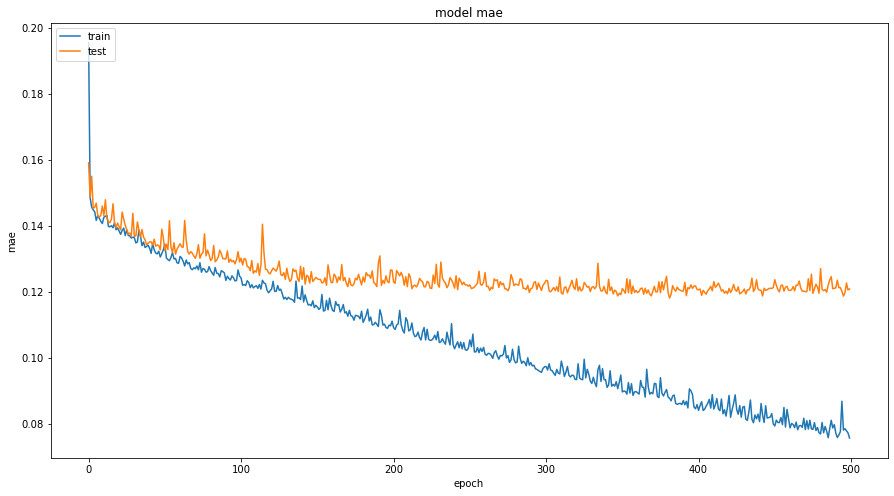

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
prediction = NN_model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.4767732  0.14066057 0.31571865]
 [0.589919   0.17034341 0.35011476]
 [0.3873785  0.1461948  0.20270179]
 ...
 [0.6870587  0.25773656 0.55559623]
 [0.47254607 0.10749255 0.2510724 ]
 [0.69626015 0.30879787 0.39934722]]
MSE:  57.13821502569319
RMSE:  7.558982406759073
MAE:  4.85499321054855


## Looking at the models predictions

TypeError: '(slice(None, None, None), 1)' is an invalid key

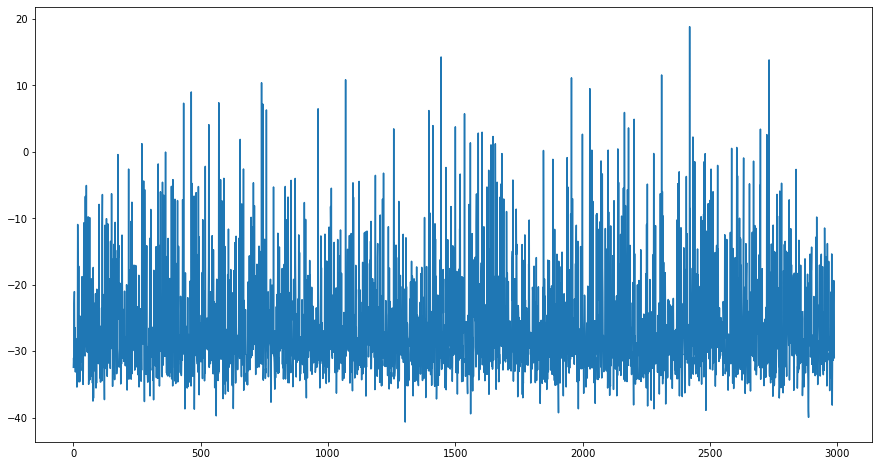

In [22]:
i = 1

y = df_rel

# Get predictions from the model
trainPredict = NN_model.predict(train_X)
testPredict= NN_model.predict(test_X)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

# Scale the predictions back to real values
preds = rel_hand_scaler.inverse_transform(predicted)

# Plot them
plt.plot(preds[:,i], label='Prediction')
plt.plot(y[:,i], label='Actual')
plt.legend()
plt.title(f"Model predictions for {y_cols[i]}")

### Save the model and the scalers

In [23]:
import joblib

model_name = "NNRel-60secs-dual-MinMaxScaled"

NN_model.save(f"../models/{model_name}.h5")
# Save hand scaler to file.
# Scales the output of the network, the relative position of the hand, min_max
joblib.dump(rel_hand_scaler, f'../models/{model_name}-Hand.gz')

# Scales the input to the network, the emg data. 
joblib.dump(emg_scaler, f'../models/{model_name}-EMG.gz')

['../models/NNRel-60secs-dual-MinMaxScaled-EMG.gz']

In [24]:
# Making a prediction in the prediction script.
from keras.models import load_model
model = load_model(f"../models/{model_name}.h5")

input_scaler = joblib.load(f'../models/{model_name}-EMG.gz')
output_scaler = joblib.load(f'../models/{model_name}-Hand.gz')

# Get some input data
semg_input = np.array([[ 31, 140, 140,  83,  42,  30,  22,  21]*2])
# Scale the input
scaled_input = input_scaler.transform(semg_input)
# Get a prediction
pred = model.predict(scaled_input)
# Scale it back to a value
scaled_pred = output_scaler.inverse_transform(pred)
scaled_pred

array([[ 62.14927 , -28.200672, -10.346904]], dtype=float32)

## RNN

LSTM layer is a recurrent layer, hence it expects a 3-dimensional input (batch_size, timesteps, input_dim).

For some reason, using LSTMs gave me a: CuDNNLSTM: UnknownError: Fail to find the dnn implementation.
Which was solved enabling memory growth with:
```
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
```
Found on stackoverflow [here](https://stackoverflow.com/questions/54473254/cudnnlstm-unknownerror-fail-to-find-the-dnn-implementation).

In [25]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import LSTM

In [26]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16',]

y = df_rel[y_cols]
X = df_rel[x_cols]

In [27]:
def gen_seqs(X, timesteps=2):
    sX = X.astype('float32')
    for col_name in X:
        for t in range(1,timesteps):
            # Add the past col name
            sX[col_name+"_p"+str(t)] = X[col_name].shift(t)
    # Drop NaNs
    sX.dropna(inplace=True)
    return sX

Xs = gen_seqs(X)

In [28]:
Xs.shape

(2988, 32)

In [29]:
rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(Xs)

# Ensure all data is a 32bit
nX = nX.astype('float32')
ny = ny.astype('float32')

# Reshape Scaled X
features = X.shape[1]
observations = Xs.shape[0]
timesteps = 2

nX = nX.reshape(observations, features, timesteps)

# Delete the labels, we no longer have data for
ny = ny[timesteps-1:]

In [30]:
ny.shape, nX.shape

((2988, 3), (2988, 16, 2))

In [31]:
ny

array([[0.49306208, 0.28899089, 0.1240378 ],
       [0.49770498, 0.2952168 , 0.1187368 ],
       [0.5090705 , 0.30494976, 0.11952207],
       ...,
       [0.51438224, 0.16568474, 0.438331  ],
       [0.569526  , 0.21435243, 0.4916916 ],
       [0.6128559 , 0.26195723, 0.5435817 ]], dtype=float32)

In [32]:
rel_hand_scaler.transform(y)

array([[0.49246495, 0.28045072, 0.14176991],
       [0.49306208, 0.2889909 , 0.12403781],
       [0.49770497, 0.29521679, 0.1187368 ],
       ...,
       [0.51438223, 0.16568475, 0.43833102],
       [0.569526  , 0.21435242, 0.49169159],
       [0.61285593, 0.26195722, 0.5435817 ]])

In [33]:
y.head()

,Thumb_r_tip_x,Thumb_r_tip_y,Thumb_r_tip_z
0,51.706015,-25.778099,-31.954857
1,51.751778,-25.371140,-33.126869
2,52.107599,-25.074463,-33.477242
3,52.978632,-24.610666,-33.425339
4,54.664660,-24.000892,-32.757812


In [34]:
Xs

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,...,Channel_7_p1,Channel_8_p1,Channel_9_p1,Channel_10_p1,Channel_11_p1,Channel_12_p1,Channel_13_p1,Channel_14_p1,Channel_15_p1,Channel_16_p1
1,37.0,97.0,243.0,260.0,86.0,53.0,55.0,26.0,40.0,184.0,...,59.0,23.0,41.0,147.0,199.0,226.0,111.0,48.0,23.0,22.0
2,37.0,102.0,243.0,265.0,90.0,54.0,46.0,25.0,43.0,193.0,...,55.0,26.0,40.0,184.0,201.0,226.0,111.0,48.0,22.0,20.0
3,33.0,88.0,223.0,252.0,90.0,54.0,47.0,25.0,41.0,198.0,...,46.0,25.0,43.0,193.0,192.0,210.0,106.0,49.0,25.0,20.0
4,33.0,92.0,219.0,231.0,90.0,57.0,53.0,26.0,43.0,196.0,...,47.0,25.0,41.0,198.0,212.0,165.0,94.0,45.0,28.0,25.0
5,35.0,108.0,255.0,228.0,93.0,63.0,55.0,29.0,44.0,214.0,...,53.0,26.0,43.0,196.0,210.0,151.0,80.0,42.0,31.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,33.0,111.0,225.0,197.0,73.0,91.0,122.0,58.0,48.0,116.0,...,124.0,67.0,37.0,96.0,209.0,98.0,45.0,34.0,22.0,20.0
2985,27.0,130.0,226.0,221.0,84.0,96.0,116.0,34.0,52.0,123.0,...,122.0,58.0,48.0,116.0,218.0,98.0,49.0,34.0,24.0,24.0
2986,30.0,135.0,227.0,224.0,103.0,104.0,142.0,36.0,56.0,129.0,...,116.0,34.0,52.0,123.0,213.0,136.0,89.0,42.0,28.0,23.0
2987,31.0,128.0,231.0,237.0,105.0,110.0,147.0,31.0,56.0,140.0,...,142.0,36.0,56.0,129.0,208.0,143.0,101.0,42.0,29.0,25.0


In [35]:
df_rel.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,Channel_11,Channel_12,Channel_13,Channel_14,Channel_15,Channel_16,Thumb_r_tip_x,Thumb_r_tip_y,Thumb_r_tip_z
0,38,88,252,257,81,50,59,23,41,147,199,226,111,48,23,22,51.706015,-25.778099,-31.954857
1,37,97,243,260,86,53,55,26,40,184,201,226,111,48,22,20,51.751778,-25.371140,-33.126869
2,37,102,243,265,90,54,46,25,43,193,192,210,106,49,25,20,52.107599,-25.074463,-33.477242
3,33,88,223,252,90,54,47,25,41,198,212,165,94,45,28,25,52.978632,-24.610666,-33.425339
4,33,92,219,231,90,57,53,26,43,196,210,151,80,42,31,26,54.664660,-24.000892,-32.757812


In [36]:
train_X = nX[500:,:]
test_X = nX[:500,:]

train_y = ny[500:,:] # Train on the last 11466
test_y = ny[:500,:] # Test on the last 500

In [37]:
train_X.shape, train_y.shape

((2488, 16, 2), (2488, 3))

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import LSTM, SimpleRNN

In [39]:
model = Sequential()
# 8 Features and 2 timesteps
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3))

model.compile(loss='mae', optimizer='adam')

In [40]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
35/35 - 0s - loss: 0.2515 - val_loss: 0.1694
Epoch 2/50
35/35 - 0s - loss: 0.1841 - val_loss: 0.1484
Epoch 3/50
35/35 - 0s - loss: 0.1648 - val_loss: 0.1458
Epoch 4/50
35/35 - 0s - loss: 0.1587 - val_loss: 0.1458
Epoch 5/50
35/35 - 0s - loss: 0.1569 - val_loss: 0.1459
Epoch 6/50
35/35 - 0s - loss: 0.1560 - val_loss: 0.1460
Epoch 7/50
35/35 - 0s - loss: 0.1551 - val_loss: 0.1462
Epoch 8/50
35/35 - 0s - loss: 0.1546 - val_loss: 0.1462
Epoch 9/50
35/35 - 0s - loss: 0.1543 - val_loss: 0.1464
Epoch 10/50
35/35 - 0s - loss: 0.1539 - val_loss: 0.1465
Epoch 11/50
35/35 - 0s - loss: 0.1535 - val_loss: 0.1465
Epoch 12/50
35/35 - 0s - loss: 0.1533 - val_loss: 0.1466
Epoch 13/50
35/35 - 0s - loss: 0.1531 - val_loss: 0.1466
Epoch 14/50
35/35 - 0s - loss: 0.1529 - val_loss: 0.1466
Epoch 15/50
35/35 - 0s - loss: 0.1527 - val_loss: 0.1466
Epoch 16/50
35/35 - 0s - loss: 0.1525 - val_loss: 0.1467
Epoch 17/50
35/35 - 0s - loss: 0.1523 - val_loss: 0.1467
Epoch 18/50
35/35 - 0s - loss: 0.1522 - 

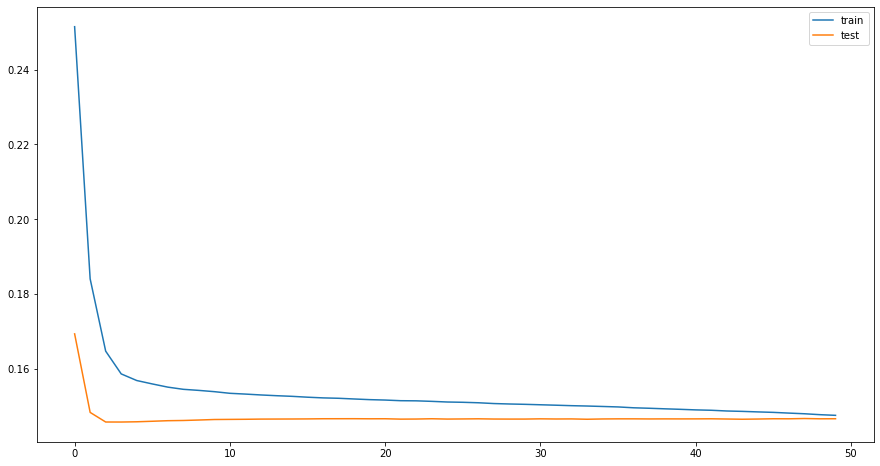

In [41]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [42]:
mea = model.evaluate(test_X, test_y)
mea

16/16 [==============================] - 0s 1ms/step - loss: 0.1467


0.14670471847057343

In [43]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.6306028  0.2336394  0.39464712]
 [0.6032802  0.208405   0.37370545]
 [0.60981923 0.21268876 0.3765392 ]
 ...
 [0.7653751  0.3975906  0.46420586]
 [0.79973006 0.44772974 0.4868945 ]
 [0.8219484  0.47198483 0.50417346]]
MSE:  145.0369
RMSE:  12.043126
MAE:  9.165136


# Simple RNN Approach

In [44]:
train_X.shape

(2488, 16, 2)

In [45]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(train_X.shape[1],train_X.shape[2]), activation="relu"))
model.add(Dense(14, activation="relu")) 
model.add(Dense(3))

model.compile(loss='mae', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4288      
_________________________________________________________________
dense_5 (Dense)              (None, 14)                910       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 45        
Total params: 5,243
Trainable params: 5,243
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)

Epoch 1/50
35/35 [==============================] - 0s 10ms/step - loss: 0.2774 - val_loss: 0.1892
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1580 - val_loss: 0.1527
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1501 - val_loss: 0.1466
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1471 - val_loss: 0.1591
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1451 - val_loss: 0.1469
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1419 - val_loss: 0.1523
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1395 - val_loss: 0.2348
Epoch 8/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1400 - val_loss: 0.1431
Epoch 9/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1368 - val_loss: 0.1472
Epoch 10/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1359 - val_loss: 0.1503
Epoch 11/50
35/35 

In [47]:
trainScore = model.evaluate(train_X, train_y, verbose=0)
trainScore

0.09703187644481659

In [48]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.70669967 0.3142505  0.56227946]
 [0.54062915 0.09978474 0.33465436]
 [0.5427643  0.09178632 0.3196889 ]
 ...
 [0.7148968  0.35466442 0.45712712]
 [0.68256986 0.26927912 0.33219013]
 [0.76104265 0.37847525 0.44011217]]
MSE:  74.00895
RMSE:  8.602845
MAE:  6.1842365


TypeError: '(slice(None, None, None), 1)' is an invalid key

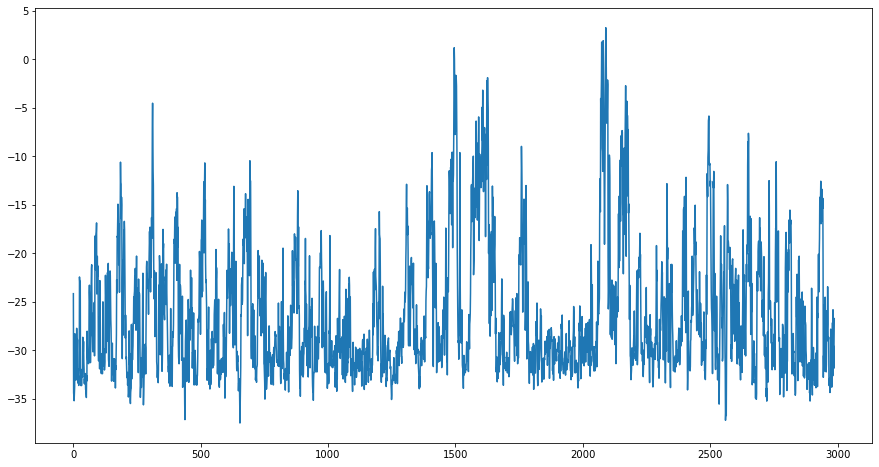

In [49]:
i = 1

# Get predictions from the model
trainPredict = model.predict(train_X)
testPredict= model.predict(test_X)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

# Scale the predictions back to real values
preds = rel_hand_scaler.inverse_transform(predicted)

# Plot them
plt.plot(preds[:,i], label='Prediction')
plt.plot(y[:,i], label='Actual')
plt.legend()
plt.title(f"Model predictions for {y_cols[i]}")

# Non Trivial RNN Arc

In [50]:
model = Sequential()
# 8 Features and 2 timesteps
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16, 50)            10600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_7 (Dense)              (None, 14)                714       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 45        
Total params: 31,559
Trainable params: 31,559
Non-trainable params: 0
_________________________________________________________________


In [51]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=False)

Epoch 1/50
35/35 [==============================] - 1s 15ms/step - loss: 0.2228 - val_loss: 0.1693
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1676 - val_loss: 0.1635
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1677 - val_loss: 0.1587
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1720 - val_loss: 0.1521
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1714 - val_loss: 0.1458
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1643 - val_loss: 0.1458
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1606 - val_loss: 0.1461
Epoch 8/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1591 - val_loss: 0.1467
Epoch 9/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1577 - val_loss: 0.1471
Epoch 10/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1569 - val_loss: 0.1471
Epoch 11/50
35/35 

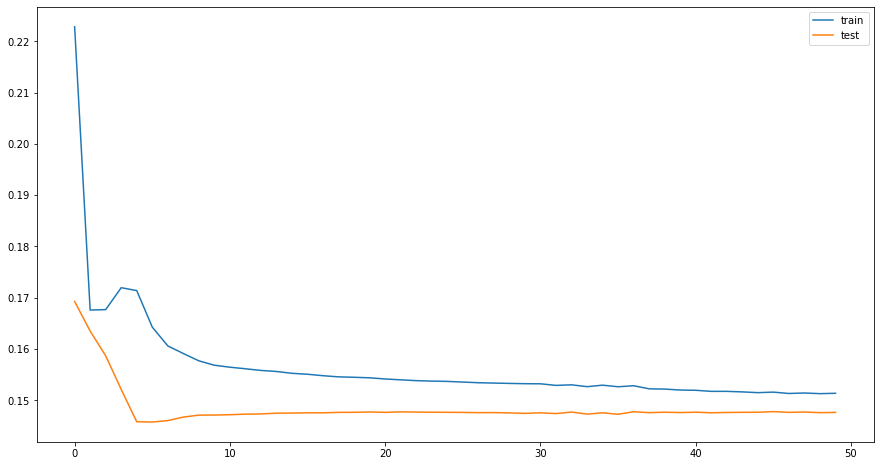

In [52]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

MAE still performs better as a loss than MSE

Results of minimising MSE loss

In [53]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.61918676 0.21526209 0.38434678]
 [0.5998051  0.19431001 0.36992687]
 [0.60822475 0.20480281 0.37547833]
 ...
 [0.73426414 0.38002735 0.44364244]
 [0.76558185 0.42804894 0.4601006 ]
 [0.78900766 0.45782742 0.4774387 ]]
MSE:  149.04358
RMSE:  12.208341
MAE:  9.323253


TypeError: '(slice(None, None, None), 1)' is an invalid key

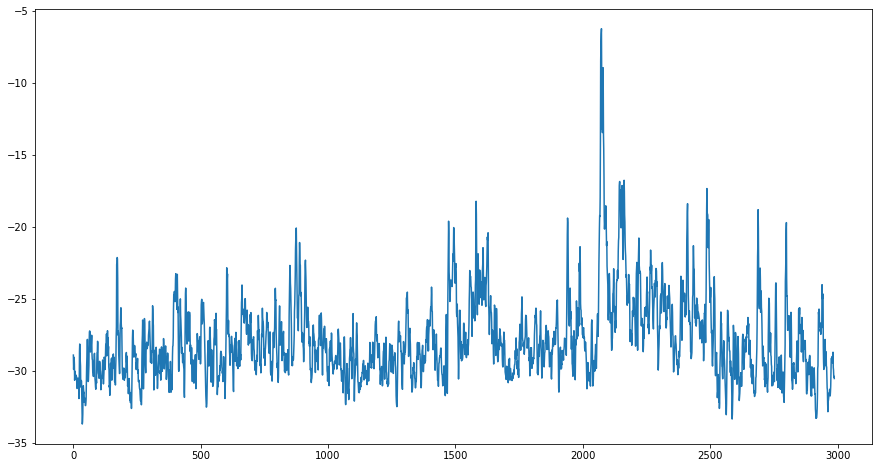

In [54]:
i = 1

# Get predictions from the model
trainPredict = model.predict(train_X)
testPredict= model.predict(test_X)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

# Scale the predictions back to real values
preds = rel_hand_scaler.inverse_transform(predicted)

# Plot them
plt.plot(preds[:,i], label='Prediction')
plt.plot(y[:,i], label='Actual')
plt.legend()
plt.title(f"Model predictions for {y_cols[i]}")

## Longer Timesequence RNN

In [55]:
timesteps = 20

y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16',]

y = df_rel[y_cols]
X = df_rel[x_cols]

def gen_seqs(X, timesteps=2):
    sX = X.astype('float32')
    for col_name in X:
        for t in range(1,timesteps):
            # Add the past col name
            sX[col_name+"_p"+str(t)] = X[col_name].shift(t)
    # Drop NaNs
    sX.dropna(inplace=True)
    return sX

Xs = gen_seqs(X, timesteps)

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(Xs)

# Ensure all data is a 32bit
nX = nX.astype('float32')
ny = ny.astype('float32')

# Reshape Scaled X
features = X.shape[1]
observations = Xs.shape[0]

nX = nX.reshape(observations, features, timesteps)

# Delete the labels, we no longer have data for
ny = ny[timesteps-1:]

train_X = nX[500:,:]
test_X = nX[:500,:]

train_y = ny[500:,:] # Train on the last 11466
test_y = ny[:500,:] # Test on the last 500

In [56]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 16, 64)            21760     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 14)                462       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [57]:
# fit network, with 16 channels
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
35/35 [==============================] - 1s 15ms/step - loss: 0.2011 - val_loss: 0.1396
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1573 - val_loss: 0.1374
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1497 - val_loss: 0.1326
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1425 - val_loss: 0.1388
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1390 - val_loss: 0.1332
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1323 - val_loss: 0.1324
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1301 - val_loss: 0.1300
Epoch 8/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1263 - val_loss: 0.1305
Epoch 9/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1229 - val_loss: 0.1324
Epoch 10/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1267 - val_loss: 0.1295
Epoch 11/50
35/35 

In [58]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
35/35 [==============================] - 0s 7ms/step - loss: 0.0901 - val_loss: 0.1236
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0940 - val_loss: 0.1248
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0923 - val_loss: 0.1240
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0896 - val_loss: 0.1194
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0893 - val_loss: 0.1194
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0903 - val_loss: 0.1225
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0883 - val_loss: 0.1201
Epoch 8/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0882 - val_loss: 0.1223
Epoch 9/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0879 - val_loss: 0.1152
Epoch 10/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0878 - val_loss: 0.1191
Epoch 11/50
35/35 [

16/16 [==============================] - 0s 2ms/step - loss: 0.1309


0.1308905929327011

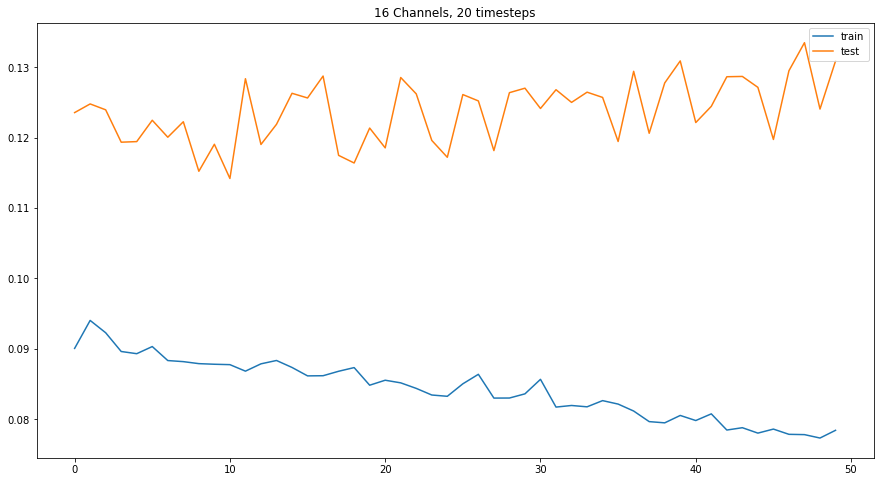

In [59]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("16 Channels, 20 timesteps")
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


16/16 [==============================] - 0s 3ms/step - loss: 0.1309


0.1308905929327011

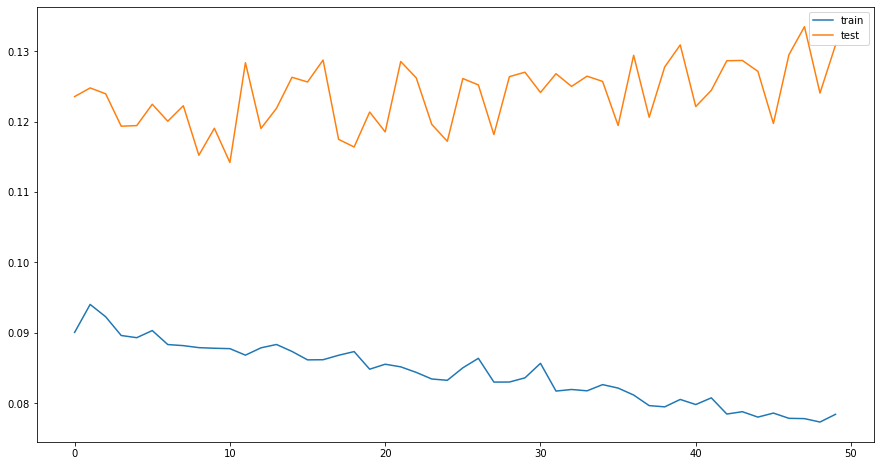

In [60]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


In [61]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.5466921  0.14584865 0.43245387]
 [0.5428156  0.14020519 0.4043574 ]
 [0.54099905 0.13777593 0.39053094]
 ...
 [0.6567836  0.24437109 0.4442429 ]
 [0.65735894 0.25250396 0.42345333]
 [0.66949356 0.2702918  0.43144572]]
MSE:  41.296032
RMSE:  6.426199
MAE:  4.529331


In [62]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 16, 256)           283648    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 256)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 16, 256)           525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)              

In [63]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
35/35 [==============================] - 1s 24ms/step - loss: 0.4336 - val_loss: 0.1801
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.1763 - val_loss: 0.1642
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1503 - val_loss: 0.1605
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1399 - val_loss: 0.1617
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1323 - val_loss: 0.1568
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1321 - val_loss: 0.1606
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1299 - val_loss: 0.1561
Epoch 8/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1285 - val_loss: 0.1570
Epoch 9/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1257 - val_loss: 0.1585
Epoch 10/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1225 - val_loss: 0.1539
Epoch 11/50
35/35

16/16 [==============================] - 0s 3ms/step - loss: 0.1535


0.15349401533603668

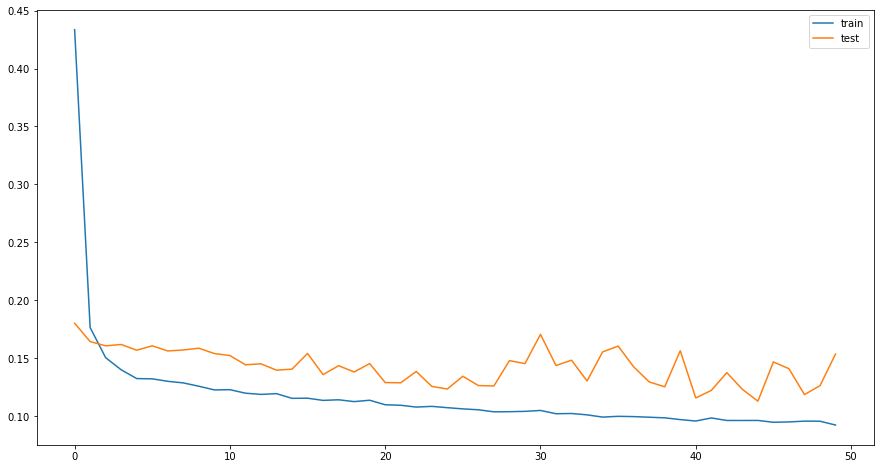

In [64]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


In [65]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.66273105 0.24423775 0.4904812 ]
 [0.6260464  0.20959878 0.43915743]
 [0.63388395 0.20921811 0.44242537]
 ...
 [0.79444516 0.40128535 0.536365  ]
 [0.80351    0.39638287 0.54538023]
 [0.8064577  0.3978957  0.5587636 ]]
MSE:  83.950165
RMSE:  9.162433
MAE:  6.8061676


In [66]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 16, 256)           283648    
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 256)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 16, 256)           525312    
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 256)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)              

In [67]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
35/35 [==============================] - 1s 22ms/step - loss: 0.6123 - val_loss: 0.1849
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 0.2650 - val_loss: 0.1590
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1902 - val_loss: 0.1504
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1586 - val_loss: 0.1559
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1475 - val_loss: 0.1533
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1366 - val_loss: 0.1523
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1335 - val_loss: 0.1554
Epoch 8/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1315 - val_loss: 0.1558
Epoch 9/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1286 - val_loss: 0.1459
Epoch 10/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1254 - val_loss: 0.1495
Epoch 11/50
35/35 

16/16 [==============================] - 0s 3ms/step - loss: 0.1629


0.16287726163864136

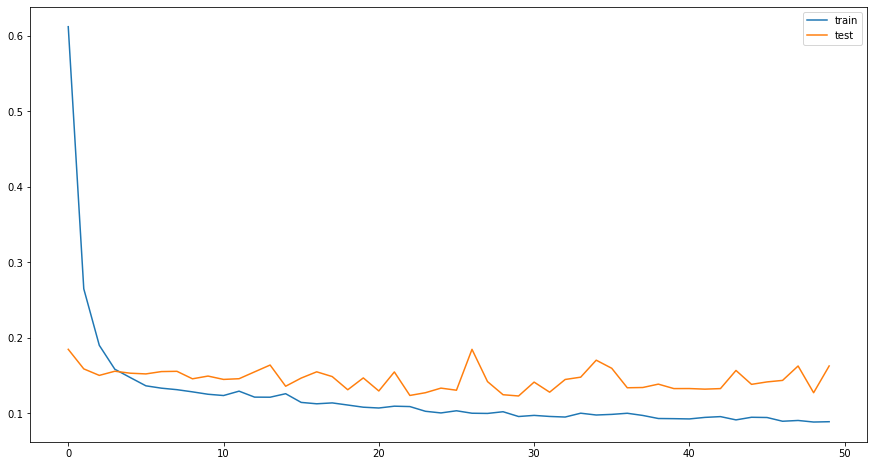

In [68]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


In [69]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.5783841  0.109826   0.4361264 ]
 [0.56904924 0.0996365  0.41715413]
 [0.5736171  0.10534938 0.42169982]
 ...
 [0.7046532  0.24926221 0.43514013]
 [0.748468   0.29618654 0.47322303]
 [0.7864486  0.35198113 0.5297367 ]]
MSE:  70.645966
RMSE:  8.405115
MAE:  6.450895


# Is my model even learning anything?

In [70]:
df_rel[x_cols].var()

Channel_1       92.940473
Channel_2     1047.795142
Channel_3     1583.356274
Channel_4     1396.340594
Channel_5      113.502041
Channel_6      219.077164
Channel_7      730.230781
Channel_8      175.035141
Channel_9       60.000913
Channel_10     921.456540
Channel_11    1609.849338
Channel_12     705.221750
Channel_13     232.078210
Channel_14      33.407059
Channel_15      10.273463
Channel_16     166.005524
dtype: float64

In [71]:
timesteps = 20

y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_2', 'Channel_3', 'Channel_4']

y = df_rel[y_cols]
X = df_rel[x_cols]

def gen_seqs(X, timesteps=2):
    sX = X.astype('float32')
    for col_name in X:
        for t in range(1,timesteps):
            # Add the past col name
            sX[col_name+"_p"+str(t)] = X[col_name].shift(t)
    # Drop NaNs
    sX.dropna(inplace=True)
    return sX

Xs = gen_seqs(X, timesteps)

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(Xs)

# Ensure all data is a 32bit
nX = nX.astype('float32')
ny = ny.astype('float32')

# Reshape Scaled X
features = X.shape[1]
observations = Xs.shape[0]

nX = nX.reshape(observations, features, timesteps)

# Delete the labels, we no longer have data for
ny = ny[timesteps-1:]

train_X = nX[500:,:]
test_X = nX[:500,:]

train_y = ny[500:,:] # Train on the last 11466
test_y = ny[:500,:] # Test on the last 500

In [72]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 3, 256)            283648    
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 256)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 3, 256)            525312    
_________________________________________________________________
dropout_11 (Dropout)         (None, 3, 256)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)              

In [73]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.59670526 0.20180646 0.40593085]
 [0.5869407  0.19645536 0.39388442]
 [0.568058   0.1893294  0.3723945 ]
 ...
 [0.6250989  0.28422678 0.37297785]
 [0.69652855 0.32846457 0.46775976]
 [0.75105506 0.3616451  0.5387238 ]]
MSE:  94.29488
RMSE:  9.710555
MAE:  7.2201133


# Considering more data for a fully connected architecture


In [74]:
df1 = pd.read_csv("../data/dual_thumb_emg_20.csv")
df2 = pd.read_csv("../data/dual_thumb_emg_60.csv")
df3 = pd.read_csv("../data/dual_thumb_emg_90.csv")

big_df = df1.append(df2).append(df3)

In [75]:
big_df = big_df.dropna()

In [76]:
big_df.describe()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,...,Index_tip_y,Middle_tip_y,Ring_tip_y,Pinky_tip_y,Palm_tip_z,Thumb_tip_z,Index_tip_z,Middle_tip_z,Ring_tip_z,Pinky_tip_z
count,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,...,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000
mean,32.369055,82.711318,152.872064,142.944884,58.171368,61.557064,83.635076,28.155199,36.456391,105.125811,...,-68.963017,-77.358727,-70.706500,-52.895699,141.703711,124.660918,140.959821,126.019362,116.783797,111.061251
std,7.596009,28.862459,39.947078,37.887920,11.319597,13.057107,22.783912,9.565026,7.796985,38.313062,...,13.661742,14.180815,13.370414,12.398840,12.512466,19.071209,13.329667,14.717593,13.951317,14.385735
min,16.000000,27.000000,48.000000,45.000000,27.000000,27.000000,19.000000,17.000000,21.000000,38.000000,...,-91.182396,-101.395004,-93.281807,-74.881454,106.961754,78.297310,107.145988,88.627296,80.711517,74.671944
25%,28.000000,66.000000,126.000000,119.000000,51.000000,53.000000,68.000000,25.000000,31.000000,79.000000,...,-81.473190,-89.208702,-82.454391,-64.038139,134.182968,110.682755,132.559189,116.000778,108.173355,101.966080
50%,31.000000,80.000000,149.000000,140.000000,58.000000,60.000000,80.000000,27.000000,35.000000,97.000000,...,-71.869713,-81.291908,-73.561447,-54.555096,140.474823,121.957825,139.103729,124.454781,115.710762,110.995247
75%,35.000000,94.000000,174.000000,164.000000,65.000000,68.000000,97.000000,29.000000,40.000000,122.000000,...,-58.144440,-65.804260,-61.850285,-45.695801,150.134415,136.279770,146.262527,132.964386,123.833229,118.194801
max,108.000000,369.000000,416.000000,402.000000,133.000000,162.000000,246.000000,234.000000,127.000000,439.000000,...,-36.672607,-47.621513,-42.139599,-23.060318,172.289871,180.504608,175.812469,163.695572,151.784973,148.608871


[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

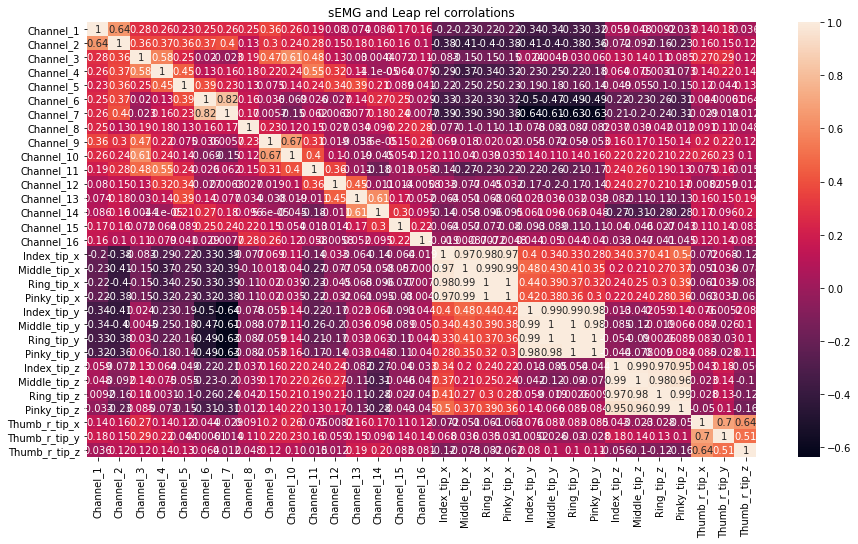

In [77]:
df_rel = big_df
df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
df_rel["Thumb_r_tip_z"] = df_rel["Thumb_tip_z"] - df_rel['Palm_tip_z']

drop_cols = ['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df_rel = df_rel.drop(drop_cols,1)
sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

In [78]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16',]

y = df_rel[y_cols]
X = df_rel[x_cols]

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(nX, ny, test_size=0.25)

In [79]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mae', optimizer='Adam')
NN_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_25 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 771       
Total params: 69,003
Trainable params: 69,003
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1676 - val_loss: 0.1447
Epoch 2/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.1455
Epoch 3/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1414
Epoch 4/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1531
Epoch 5/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1401
Epoch 6/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1418
Epoch 7/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1404
Epoch 8/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1392
Epoch 9/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1406
Epoch 10/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1387 - val_lo

199/199 [==============================] - 0s 2ms/step - loss: 0.1232 - val_loss: 0.1278
Epoch 82/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1230 - val_loss: 0.1286
Epoch 83/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1229 - val_loss: 0.1310
Epoch 84/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1228 - val_loss: 0.1294
Epoch 85/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1230 - val_loss: 0.1285
Epoch 86/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1231 - val_loss: 0.1286
Epoch 87/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1219 - val_loss: 0.1301
Epoch 88/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1224 - val_loss: 0.1278
Epoch 89/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1219 - val_loss: 0.1287
Epoch 90/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1214 - val_loss: 

Epoch 161/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1121 - val_loss: 0.1257
Epoch 162/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1118 - val_loss: 0.1257
Epoch 163/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1114 - val_loss: 0.1274
Epoch 164/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1118 - val_loss: 0.1250
Epoch 165/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1113 - val_loss: 0.1250
Epoch 166/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1111 - val_loss: 0.1248
Epoch 167/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1114 - val_loss: 0.1264
Epoch 168/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1111 - val_loss: 0.1259
Epoch 169/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1105 - val_loss: 0.1272
Epoch 170/500
199/199 [==============================] - 0s 2ms/step - lo

199/199 [==============================] - 0s 2ms/step - loss: 0.1034 - val_loss: 0.1249
Epoch 241/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1031 - val_loss: 0.1238
Epoch 242/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1030 - val_loss: 0.1253
Epoch 243/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1026 - val_loss: 0.1247
Epoch 244/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1030 - val_loss: 0.1250
Epoch 245/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1027 - val_loss: 0.1246
Epoch 246/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1031 - val_loss: 0.1247
Epoch 247/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1022 - val_loss: 0.1243
Epoch 248/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1027 - val_loss: 0.1245
Epoch 249/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1025 - v

199/199 [==============================] - 0s 2ms/step - loss: 0.0968 - val_loss: 0.1253
Epoch 320/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0963 - val_loss: 0.1250
Epoch 321/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0963 - val_loss: 0.1255
Epoch 322/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0966 - val_loss: 0.1240
Epoch 323/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0964 - val_loss: 0.1266
Epoch 324/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0959 - val_loss: 0.1259
Epoch 325/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0965 - val_loss: 0.1264
Epoch 326/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0959 - val_loss: 0.1254
Epoch 327/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0963 - val_loss: 0.1244
Epoch 328/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0961 - v

199/199 [==============================] - 0s 2ms/step - loss: 0.0916 - val_loss: 0.1260
Epoch 399/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0914 - val_loss: 0.1263
Epoch 400/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0917 - val_loss: 0.1284
Epoch 401/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0918 - val_loss: 0.1268
Epoch 402/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0913 - val_loss: 0.1279
Epoch 403/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0925 - val_loss: 0.1269
Epoch 404/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0915 - val_loss: 0.1247
Epoch 405/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0916 - val_loss: 0.1256
Epoch 406/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0917 - val_loss: 0.1262
Epoch 407/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0919 - v

199/199 [==============================] - 0s 2ms/step - loss: 0.0888 - val_loss: 0.1255
Epoch 478/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0880 - val_loss: 0.1269
Epoch 479/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0884 - val_loss: 0.1268
Epoch 480/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0884 - val_loss: 0.1264
Epoch 481/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0880 - val_loss: 0.1267
Epoch 482/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0882 - val_loss: 0.1266
Epoch 483/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0879 - val_loss: 0.1265
Epoch 484/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0876 - val_loss: 0.1269
Epoch 485/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0878 - val_loss: 0.1263
Epoch 486/500
199/199 [==============================] - 0s 2ms/step - loss: 0.0876 - v

In [81]:
# Evaluate the model on the test data
mae = NN_model.evaluate(test_X, test_y)
mae

67/67 [==============================] - 0s 774us/step - loss: 0.1275


0.12754541635513306

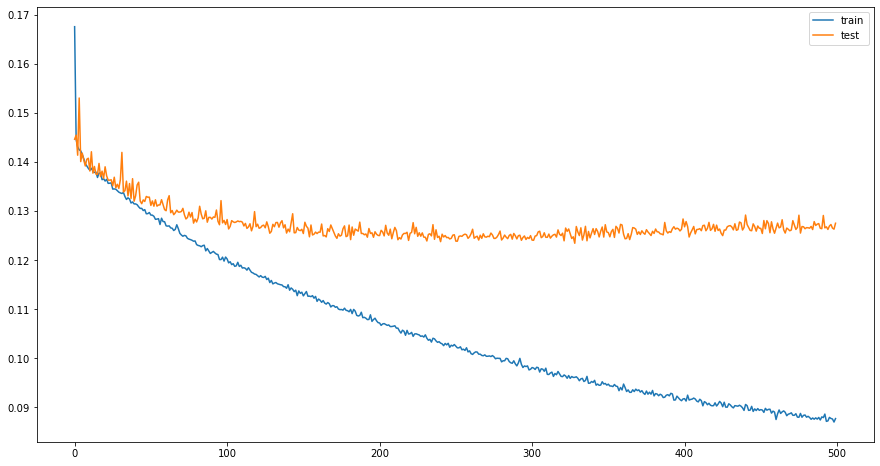

In [82]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [83]:
prediction = NN_model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.8590808  0.5212779  0.40905857]
 [0.57130456 0.15822956 0.37256113]
 [0.80416447 0.6541593  0.7288128 ]
 ...
 [0.86305434 0.57074    0.43557787]
 [0.56331086 0.2881463  0.22998524]
 [0.6613933  0.28127864 0.2660778 ]]
MSE:  89.37863253476824
RMSE:  9.454027318279138
MAE:  6.224649277753734


In [84]:
model = Sequential()

# The Input Layer :
model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(14 ,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))

# The Output Layer :
model.add(Dense(3, kernel_initializer='normal'))

# Compile the network :
model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_29 (Dense)             (None, 256)               2304      
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_31 (Dense)             (None, 14)                3598      
_________________________________________________________________
dense_32 (Dense)             (None, 32)               

In [85]:
history = model.fit(train_X, train_y, epochs=500, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/500
199/199 [==============================] - 1s 4ms/step - loss: 0.1824 - val_loss: 0.2878
Epoch 2/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1533 - val_loss: 0.1968
Epoch 3/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1478 - val_loss: 0.1745
Epoch 4/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1452 - val_loss: 0.1620
Epoch 5/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1423 - val_loss: 0.1507
Epoch 6/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1410 - val_loss: 0.1396
Epoch 7/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1394 - val_loss: 0.1498
Epoch 8/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1396 - val_loss: 0.1496
Epoch 9/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1388 - val_loss: 0.1446
Epoch 10/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1387 - val_lo

199/199 [==============================] - 1s 3ms/step - loss: 0.1312 - val_loss: 0.1351
Epoch 82/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1312 - val_loss: 0.1370
Epoch 83/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1315 - val_loss: 0.1341
Epoch 84/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1303 - val_loss: 0.1317
Epoch 85/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1299 - val_loss: 0.1348
Epoch 86/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1303 - val_loss: 0.1323
Epoch 87/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1305 - val_loss: 0.1382
Epoch 88/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1306 - val_loss: 0.1361
Epoch 89/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1308 - val_loss: 0.1337
Epoch 90/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1299 - val_loss: 

Epoch 161/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1298 - val_loss: 0.1336
Epoch 162/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1291 - val_loss: 0.1336
Epoch 163/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1289 - val_loss: 0.1335
Epoch 164/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1287 - val_loss: 0.1327
Epoch 165/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1283 - val_loss: 0.1326
Epoch 166/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1291 - val_loss: 0.1352
Epoch 167/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1288 - val_loss: 0.1365
Epoch 168/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1292 - val_loss: 0.1326
Epoch 169/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1282 - val_loss: 0.1325
Epoch 170/500
199/199 [==============================] - 1s 3ms/step - lo

199/199 [==============================] - 1s 3ms/step - loss: 0.1283 - val_loss: 0.1326
Epoch 241/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1283 - val_loss: 0.1335
Epoch 242/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1276 - val_loss: 0.1330
Epoch 243/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1280 - val_loss: 0.1386
Epoch 244/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1284 - val_loss: 0.1317
Epoch 245/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1283 - val_loss: 0.1345
Epoch 246/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1276 - val_loss: 0.1346
Epoch 247/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1279 - val_loss: 0.1356
Epoch 248/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1278 - val_loss: 0.1350
Epoch 249/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1285 - v

199/199 [==============================] - 1s 3ms/step - loss: 0.1280 - val_loss: 0.1319
Epoch 320/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1266 - val_loss: 0.1329
Epoch 321/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1274 - val_loss: 0.1376
Epoch 322/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1272 - val_loss: 0.1327
Epoch 323/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1274 - val_loss: 0.1326
Epoch 324/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1274 - val_loss: 0.1334
Epoch 325/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1272 - val_loss: 0.1330
Epoch 326/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1263 - val_loss: 0.1312
Epoch 327/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1270 - val_loss: 0.1323
Epoch 328/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1273 - v

199/199 [==============================] - 1s 3ms/step - loss: 0.1273 - val_loss: 0.1348
Epoch 399/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1270 - val_loss: 0.1327
Epoch 400/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1259 - val_loss: 0.1342
Epoch 401/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1271 - val_loss: 0.1318
Epoch 402/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.1320
Epoch 403/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.1330
Epoch 404/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.1348
Epoch 405/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1266 - val_loss: 0.1321
Epoch 406/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1264 - val_loss: 0.1306
Epoch 407/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1267 - v

199/199 [==============================] - 1s 3ms/step - loss: 0.1268 - val_loss: 0.1310
Epoch 478/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1263 - val_loss: 0.1321
Epoch 479/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1270 - val_loss: 0.1310
Epoch 480/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.1310
Epoch 481/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.1331
Epoch 482/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1270 - val_loss: 0.1320
Epoch 483/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.1320
Epoch 484/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1268 - val_loss: 0.1347
Epoch 485/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1271 - val_loss: 0.1326
Epoch 486/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1259 - v

In [86]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.6481775  0.24512033 0.40023276]
 [0.5807639  0.17088808 0.3394575 ]
 [0.89530134 0.59536767 0.64362395]
 ...
 [0.83538646 0.47891855 0.6155276 ]
 [0.5772155  0.23797415 0.25781912]
 [0.61061156 0.23739152 0.27538654]]
MSE:  150.73843945853778
RMSE:  12.27755836714034
MAE:  8.8536402192794
